In [6]:
import fitbit
import json
import datetime as dt
from oauthlib.oauth2 import LegacyApplicationClient
from requests_oauthlib import OAuth2Session

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [7]:
CREDS_FILE = '../config/fitbit_creds.json'
TOKEN_FILE = '../config/fitbit_token.json'

In [8]:
# tokenファイルを上書きする関数
def update_token(token):
    f = open(TOKEN_FILE, 'w')
    f.write(str(token))
    f.close()
    return

In [9]:
# トークン情報をファイルから読み込む
with open(TOKEN_FILE, 'r') as f:
    token_data = json.load(f)

with open(CREDS_FILE, 'r') as f:
    creds = json.load(f)

# Fitbitクライアントを作成
client = fitbit.Fitbit(creds['client_id'],
                       creds['client_secret'],
                       oauth2=True,
                       access_token=token_data['access_token'],
                       refresh_token=token_data['refresh_token'],
                       refresh_cb=update_token)

In [10]:
def json_to_row(data):
    sleep = data['sleep'][0]
    summary = data['summary']
    stages = summary['stages']
    
    sleep.pop('minuteData')
    summary.pop('stages')
    
    return {**sleep, 
            **summary,
            "deepStage": stages['deep'],
            "lightStage": stages['light'],
            "remStage": stages['rem'],
            "wakeStage": stages['wake']}

In [23]:
# 睡眠データを取得
start_date = dt.date(2023, 7, 28)
end_date = start_date + dt.timedelta(days=30)

sleep_data = []

for day in (start_date + dt.timedelta(n) for n in range((end_date-start_date).days)):
    sleep = client.get_sleep(date=day)
    sleep_data.append(json_to_row(sleep))


IndexError: list index out of range

In [18]:
sleep_data

[{'awakeCount': 3,
  'awakeDuration': 6,
  'awakeningsCount': 13,
  'dateOfSleep': '2023-05-07',
  'duration': 30780000,
  'efficiency': 96,
  'endTime': '2023-05-07T07:24:30.000',
  'isMainSleep': True,
  'logId': 41231650660,
  'minutesAfterWakeup': 0,
  'minutesAsleep': 491,
  'minutesAwake': 22,
  'minutesToFallAsleep': 0,
  'restlessCount': 10,
  'restlessDuration': 16,
  'startTime': '2023-05-06T22:51:00.000',
  'timeInBed': 513,
  'totalMinutesAsleep': 491,
  'totalSleepRecords': 1,
  'totalTimeInBed': 513,
  'deepStage': 98,
  'lightStage': 223,
  'remStage': 153,
  'wakeStage': 39},
 {'awakeCount': 0,
  'awakeDuration': 0,
  'awakeningsCount': 7,
  'dateOfSleep': '2023-05-08',
  'duration': 30240000,
  'efficiency': 44,
  'endTime': '2023-05-08T07:44:30.000',
  'isMainSleep': True,
  'logId': 41241721398,
  'minutesAfterWakeup': 0,
  'minutesAsleep': 222,
  'minutesAwake': 282,
  'minutesToFallAsleep': 0,
  'restlessCount': 7,
  'restlessDuration': 43,
  'startTime': '2023-05-

## データ整形

In [20]:
df = pd.DataFrame(sleep_data)
df['dateOfSleep'] = pd.to_datetime(df['dateOfSleep'])

# 'date'カラムをインデックスとして設定
df.set_index('dateOfSleep', inplace=True)
df

,awakeCount,awakeDuration,awakeningsCount,duration,efficiency,endTime,isMainSleep,logId,minutesAfterWakeup,minutesAsleep,...,restlessDuration,startTime,timeInBed,totalMinutesAsleep,totalSleepRecords,totalTimeInBed,deepStage,lightStage,remStage,wakeStage
dateOfSleep,,,,,,,,,,,,,,,,,,,,,
2023-05-07,3,6,13,30780000,96,2023-05-07T07:24:30.000,True,41231650660,0,491,...,16,2023-05-06T22:51:00.000,513,491,1,513,98,223,153,39
2023-05-08,0,0,7,30240000,44,2023-05-08T07:44:30.000,True,41241721398,0,222,...,43,2023-05-07T23:20:30.000,504,222,1,504,58,258,123,65
2023-05-09,0,0,11,20760000,36,2023-05-09T05:59:30.000,True,41257353989,0,124,...,222,2023-05-09T00:13:00.000,346,124,1,346,41,187,86,32
2023-05-10,2,3,21,26640000,49,2023-05-10T06:07:00.000,True,41274949495,34,202,...,239,2023-05-09T22:42:30.000,444,202,1,444,104,194,97,49
2023-05-11,0,0,9,25140000,50,2023-05-11T07:31:30.000,True,41286394883,22,199,...,123,2023-05-11T00:32:00.000,419,199,1,419,72,196,95,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-22,1,2,15,22620000,62,2023-07-22T06:45:30.000,True,42140392459,23,220,...,155,2023-07-22T00:28:00.000,377,220,1,377,64,192,80,41
2023-07-23,2,2,18,24840000,43,2023-07-23T06:36:30.000,True,42151804700,21,168,...,244,2023-07-22T23:42:00.000,414,168,1,414,31,262,73,48
2023-07-24,0,0,16,24540000,59,2023-07-24T06:12:30.000,True,42163217332,10,234,...,175,2023-07-23T23:23:00.000,409,234,1,409,66,192,119,32


In [21]:
df.to_csv('sleep_data.csv')

## 2週間分のデータ取得

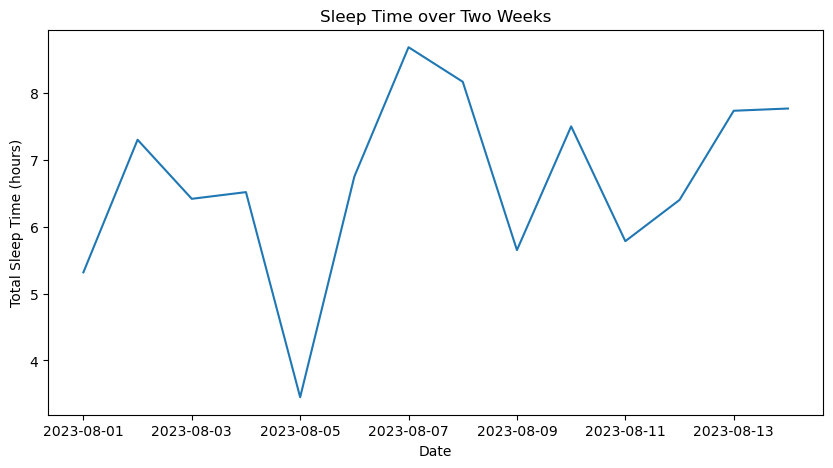

In [53]:
# 睡眠データを取得
start_date = dt.date(2023, 8, 1)
end_date = start_date + dt.timedelta(days=14)

dates = []
total_sleep_times = []

for day in (start_date + dt.timedelta(n) for n in range((end_date-start_date).days)):
    sleep = client.get_sleep(date=day)
    dates.append(day)
    total_sleep_time = sum([sl['duration'] for sl in sleep['sleep']]) / 3600000  # ms to hours
    total_sleep_times.append(total_sleep_time)

# 睡眠データを可視化
plt.figure(figsize=(10, 5))
plt.plot(dates, total_sleep_times)
plt.xlabel('Date')
plt.ylabel('Total Sleep Time (hours)')
plt.title('Sleep Time over Two Weeks')
plt.show()

## code interpreter

In [33]:
import json

file_path = "/home/tsu-nera/Downloads/Takeout/Fitbit/Global Export Data/sleep-2023-07-15.json"

# Load the json file
with open(file_path) as file:
    data = json.load(file)

# Let's print the first record to understand the structure of the data
data[0]

{'logId': 42232788154,
 'dateOfSleep': '2023-07-30',
 'startTime': '2023-07-30T00:01:00.000',
 'endTime': '2023-07-30T05:21:30.000',
 'duration': 19200000,
 'minutesToFallAsleep': 0,
 'minutesAsleep': 275,
 'minutesAwake': 45,
 'minutesAfterWakeup': 0,
 'timeInBed': 320,
 'efficiency': 49,
 'type': 'stages',
 'infoCode': 0,
 'logType': 'auto_detected',
 'levels': {'summary': {'deep': {'count': 2,
    'minutes': 73,
    'thirtyDayAvgMinutes': 62},
   'wake': {'count': 18, 'minutes': 45, 'thirtyDayAvgMinutes': 45},
   'light': {'count': 20, 'minutes': 155, 'thirtyDayAvgMinutes': 220},
   'rem': {'count': 6, 'minutes': 47, 'thirtyDayAvgMinutes': 81}},
  'data': [{'dateTime': '2023-07-30T00:01:00.000',
    'level': 'wake',
    'seconds': 540},
   {'dateTime': '2023-07-30T00:10:00.000', 'level': 'light', 'seconds': 360},
   {'dateTime': '2023-07-30T00:16:00.000', 'level': 'deep', 'seconds': 2610},
   {'dateTime': '2023-07-30T00:59:30.000', 'level': 'light', 'seconds': 1560},
   {'dateTime':

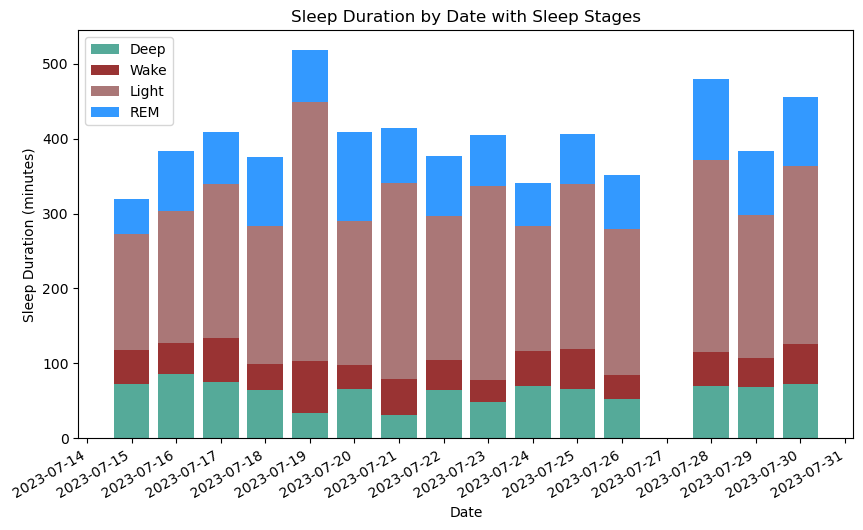

In [34]:
# Create a DataFrame for the sleep duration
duration_df = pd.DataFrame({'dateOfSleep': [record['dateOfSleep'] for record in data],
                            'minutesAsleep': [record['minutesAsleep'] for record in data]})

# Convert string date to datetime
duration_df['dateOfSleep'] = pd.to_datetime(duration_df['dateOfSleep'])

# Sort by date
duration_df = duration_df.sort_values('dateOfSleep')


# Add columns for each sleep stage duration
duration_df['deep'] = [record['levels']['summary']['deep']['minutes'] for record in data]
duration_df['wake'] = [record['levels']['summary']['wake']['minutes'] for record in data]
duration_df['light'] = [record['levels']['summary']['light']['minutes'] for record in data]
duration_df['rem'] = [record['levels']['summary']['rem']['minutes'] for record in data]

# Plot sleep duration by date with sleep stage proportions
plt.figure(figsize=(10, 6))
plt.bar(duration_df['dateOfSleep'], duration_df['deep'], label='Deep', color='#5A9')
plt.bar(duration_df['dateOfSleep'], duration_df['wake'], bottom=duration_df['deep'], label='Wake', color='#933')
plt.bar(duration_df['dateOfSleep'], duration_df['light'], bottom=duration_df['deep'] + duration_df['wake'], label='Light', color='#A77')
plt.bar(duration_df['dateOfSleep'], duration_df['rem'], bottom=duration_df['deep'] + duration_df['wake'] + duration_df['light'], label='REM', color='#39F')
plt.title('Sleep Duration by Date with Sleep Stages')
plt.xlabel('Date')
plt.ylabel('Sleep Duration (minutes)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # format x-axis label to year-month-day
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()  # rotate x-axis labels
plt.legend(loc='upper left')
plt.show()

In [42]:
# 今日の日付を取得
end_date = dt.datetime.now().date()
# 1週間前の日付を計算
start_date = end_date - dt.timedelta(days=7)                                     
                                     
# 睡眠データを保存するための空のリスト
all_sleep_data = []

# 期間中の日付ごとにループ
current_date = start_date
while current_date <= end_date:
    # 睡眠データを取得
    sleep_data = client.get_sleep(current_date)
    all_sleep_data.append(sleep_data)
    # 次の日付に移動
    current_date += dt.timedelta(days=1)

# データをpandas DataFrameに変換
df = pd.json_normalize(all_sleep_data, 'sleep')

# CSVに保存
df.to_csv('all_sleep_data.csv', index=False)

print("CSVに保存しました!")


CSVに保存しました!


In [44]:
all_sleep_data = pd.read_csv('all_sleep_data.csv')

In [46]:
all_sleep_data

,awakeCount,awakeDuration,awakeningsCount,dateOfSleep,duration,efficiency,endTime,isMainSleep,logId,minuteData,minutesAfterWakeup,minutesAsleep,minutesAwake,minutesToFallAsleep,restlessCount,restlessDuration,startTime,timeInBed
0,0,0,5,2023-08-05,12420000,41,2023-08-05T04:20:00.000,True,42301471577,"[{'dateTime': '00:53:00', 'value': '2'}, {'dat...",54,63,90,0,5,144,2023-08-05T00:53:00.000,207
1,1,3,14,2023-08-06,24300000,59,2023-08-06T07:24:30.000,True,42314422804,"[{'dateTime': '00:39:30', 'value': '2'}, {'dat...",0,239,166,0,13,163,2023-08-06T00:39:30.000,405
2,2,3,23,2023-08-07,31260000,53,2023-08-07T07:11:00.000,True,42324161483,"[{'dateTime': '22:29:30', 'value': '2'}, {'dat...",0,276,245,0,21,242,2023-08-06T22:29:30.000,521
3,1,3,5,2023-08-08,6720000,53,2023-08-08T23:37:00.000,False,42345502040,"[{'dateTime': '21:44:30', 'value': '2'}, {'dat...",54,31,27,0,4,78,2023-08-08T21:44:30.000,112
4,2,4,11,2023-08-08,22680000,69,2023-08-08T07:20:30.000,True,42336055546,"[{'dateTime': '01:02:00', 'value': '3'}, {'dat...",49,227,102,0,9,147,2023-08-08T01:02:00.000,378
5,1,3,13,2023-08-09,20340000,69,2023-08-09T06:53:00.000,True,42346529857,"[{'dateTime': '01:13:30', 'value': '1'}, {'dat...",29,215,95,0,12,121,2023-08-09T01:13:30.000,339
6,0,0,2,2023-08-10,27000000,48,2023-08-10T06:22:00.000,True,42359471438,"[{'dateTime': '22:51:30', 'value': '1'}, {'dat...",0,218,232,0,2,91,2023-08-09T22:51:30.000,450
7,1,2,17,2023-08-11,20820000,52,2023-08-11T06:21:30.000,True,42373950653,"[{'dateTime': '00:34:00', 'value': '2'}, {'dat...",23,169,155,0,16,176,2023-08-11T00:34:00.000,347
8,0,0,13,2023-08-12,23040000,66,2023-08-12T06:48:00.000,True,42384432263,"[{'dateTime': '00:24:00', 'value': '2'}, {'dat...",8,247,129,0,13,137,2023-08-12T00:24:00.000,384


In [45]:
# 日付ごとに各ステージの合計時間を再計算
datewise_stages_list = []

for _, group in all_sleep_data.groupby('dateOfSleep'):
    daily_stages_list = group['minuteData'].apply(calculate_stage_durations).tolist()
    
    # 合計処理
    daily_stages = {'Light Sleep': 0, 'Deep Sleep': 0, 'REM Sleep': 0, 'Awake': 0}
    for stage in daily_stages_list:
        for key in daily_stages:
            daily_stages[key] += stage[key]
            
    datewise_stages_list.append(daily_stages)

# データを整形
stages_df = pd.DataFrame(datewise_stages_list, index=all_sleep_data['dateOfSleep'].unique())

# 棒グラフを描画
ax = stages_df.plot(kind='bar', stacked=True, figsize=(14, 7), color=['blue', 'green', 'red', 'gray'])
plt.title('Sleep Stages Duration by Date')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.tight_layout()
plt.legend(title="Sleep Stage")
plt.show()


NameError: name 'calculate_stage_durations' is not defined